# 1. 분석상황
> 문제 1 ~ 9 번: 여러분은 E-commere  플랫폼 기업에 입사했습니다. 데이터사이언티스트의 역할로 비즈니스 지표를 정의하고 분석보고서를 내는 프로젝트에 참여하게 되었습니다. 다음 문제들을 풀어보세요.
> AARRR을 포함한 **비즈니스 지표는 정답이 없으며 회사의 상황과 의사결정자의 판단에 따라 적절한 지표를 선택해주는 것이 중요**합니다. 문제는 문제대로 푸시되, AARRR 지표에 더 좋은 옵션이 있으면 추가적으로 고민하고 기술하면서 분석역량을 키워보세요!



# 2. 데이터 설명
- **InvoiceNo**: 송장 번호. 명목형. 각 거래에 고유하게 할당된 6자리 정수. 이 코드가 문자 'c'로 시작하면 해당 거래가 취소된 것을 나타냅니다.  
- **StockCode**: 상품 코드. 명목형. 각 상품에 고유하게 할당된 5자리 정수입니다.  
- **Description**: 상품명. 명목형. 거래된 상품의 이름입니다.  
- **Quantity**: 상품별 거래 수량. 수치형. 각 거래에서 구매된 해당 상품의 개수입니다.  
- **InvoiceDate**: 거래 일시. 날짜·시간형. 거래가 발생한 날짜와 시간입니다.  
- **UnitPrice**: 단가. 수치형. 상품 한 단위당 가격(영국 파운드 £)입니다.  
- **CustomerID**: 고객 번호. 명목형. 각 고객에게 고유하게 할당된 5자리 정수입니다.  
- **Country**: 국가명. 명목형. 고객이 거주하는 국가의 이름입니다.  

# 문제 1: 데이터 로드 및 탐색
- **데이터의 첫 5개 행을 출력**하여 데이터 형식을 확인하세요.
- **데이터프레임의 컬럼 정보**와 **결측치 여부**를 확인하고 전처리 전략을 고민해보세요.

In [1]:
import os # 디렉토리 위치 확인
os.getcwd()

'/Users/kenny/데싸4기/프로젝트/Quest 03'

In [2]:
os.listdir() # 데이터 이름 확인

['.DS_Store',
 'online_retail_II.xlsx',
 '.ipynb_checkpoints',
 'online+retail+ii.zip',
 '통계분석.ipynb']

In [3]:
import pandas as pd

file_path = 'online_retail_II.xlsx'

# 1) sheet_name=None 으로 모든 시트를 dict 형태로 읽고
sheets = pd.read_excel(file_path, sheet_name=None)

# 2) dict.values()(DataFrame 목록)를 concat으로 한 번에 합치기
data = pd.concat(sheets.values(), ignore_index=True)

# 3) 잘 합쳐졌는지 첫 5행 확인
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
data.isna().sum() # 결측치 확인

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

# 문제 2: 데이터 전처리
- `InvoiceDate` 컬럼을 날짜 형식으로 변환하고, `Customer ID`에 결측치가 있는 행을 제거하세요.
- `Customer ID`를 정수형으로 변환한 후, `InvoiceDate`를 기준으로 데이터를 정렬하세요.
- 금액을 나타내는 새로운 컬럼 `Total` 을 생성하세요 (`Quantity`와 `Price`를 곱한 값).

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [6]:
# InvoiceDate 컬럼을 날짜 형식으로 변환하고, Customer ID에 결측치가 있는 행을 제거하세요.

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data = data.dropna(subset=['Customer ID'])

In [7]:
# Customer ID를 정수형으로 변환한 후, InvoiceDate를 기준으로 데이터를 정렬하세요.

data['Customer ID'] = data['Customer ID'].astype(int) 
data.sort_values(by='InvoiceDate', ascending=True, inplace=True)

In [8]:
data.duplicated().sum() # 중복갯수 확인

26479

In [9]:
data = data.drop_duplicates() # 중복 행 제거

In [10]:
data # 제거 확인

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
...,...,...,...,...,...,...,...,...
1067357,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France
1067356,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France
1067361,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      797885 non-null  object        
 1   StockCode    797885 non-null  object        
 2   Description  797885 non-null  object        
 3   Quantity     797885 non-null  int64         
 4   InvoiceDate  797885 non-null  datetime64[ns]
 5   Price        797885 non-null  float64       
 6   Customer ID  797885 non-null  int64         
 7   Country      797885 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 54.8+ MB


In [12]:
# 금액을 나타내는 새로운 컬럼 Total 을 생성하세요 (Quantity와 Price를 곱한 값).

data['Total'] = data['Quantity'] * data['Price'] 
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


# 문제 3: 나라별 구매 시각화
- Country 컬럼을 기준으로 Customer ID의 유니크한 값을 계산하여 나라별 구매 고객 수를 시각화 해보세요

In [13]:
country_cnt = data.groupby('Country')['Customer ID'].nunique().sort_values(ascending=False) # 나라별 고유값 갯수 확인 후 저장

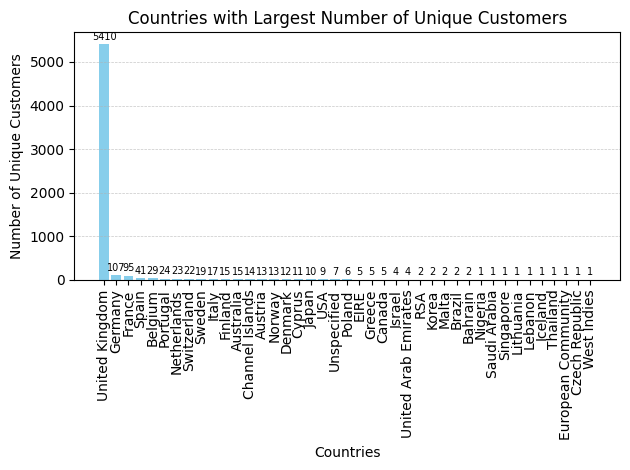

In [14]:

import matplotlib.pyplot as plt 

plt.bar(country_cnt.index, country_cnt.values, color='skyblue') # 막대 그래프 그리기

# 가시성 확보
plt.xlabel('Countries')
plt.ylabel('Number of Unique Customers')
plt.title('Countries with Largest Number of Unique Customers')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# 값 표시 
for idx, val in enumerate(country_cnt.values):
    plt.text(idx, val + country_cnt.max()*0.01, str(val),
            ha='center', va='bottom', fontsize=7)

# 여백 조정 및 출력
plt.tight_layout()
plt.show()


# 문제 4: Acquisition (고객 유입 분석)
- 신규 고객 분석을 위해 고객의 **첫 구매 시점**을 기준으로 월별 신규 유입 고객 수를 계산하세요.
- 각 고객의 첫 구매 날짜를 추출하고, **월별 신규 고객 수**를 시각화하세요.

In [15]:


first_purchase = data.groupby('Customer ID')['InvoiceDate'].min().reset_index(name='FirstPurchaseDate')

first_purchase['FirstPurchaseMonth'] = first_purchase['FirstPurchaseDate'].dt.to_period('M')

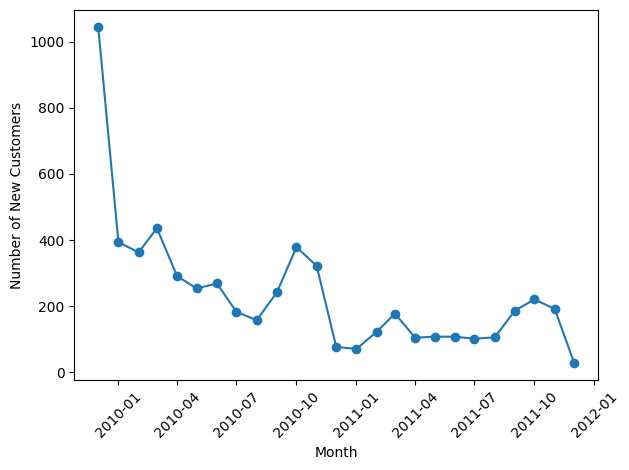

In [16]:
monthly_new =  first_purchase.groupby('FirstPurchaseMonth')['Customer ID'].nunique().sort_index()

monthly_new.index = monthly_new.index.to_timestamp()

# 시각화
plt.figure()
plt.plot(monthly_new.index, monthly_new.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Number of New Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 문제 5: Activation (고객 활성화 분석)
- 모든 고객 중 첫 구매 이후 **총 구매 금액이 특정 기준 금액 (£50)** 이상인 고객을 활성화된 고객으로 정의합니다.
- 전체 고객 수와 활성화된 고객 수를 비교하여 **활성화율**을 도출하세요.

In [17]:

# 1. 고객별 총 구매 금액 계산
customer_total = data.groupby('Customer ID')['Total'].sum()

# 2. activated customer filtering
activated = customer_total[customer_total >=50]

# 3. total customer & activated customer
total_customers = customer_total.shape[0]
activated_customers = activated.shape[0]

# 4. calculation of activation rate 
activation_rate = activated_customers / total_customers *100 

print(f"고객 활성화율: {activation_rate:.2f}%")

고객 활성화율: 97.17%


# 문제 6: Retention:코호트 분석(고객)
- 분기별 활성 사용자(MAU)를 분석하여 고객 유지 현황을 파악하세요.
- 분기별 활성 고객 수를 계산하고, 이를 시각화하여 **고객 유지 트렌드**를 분석하세요.

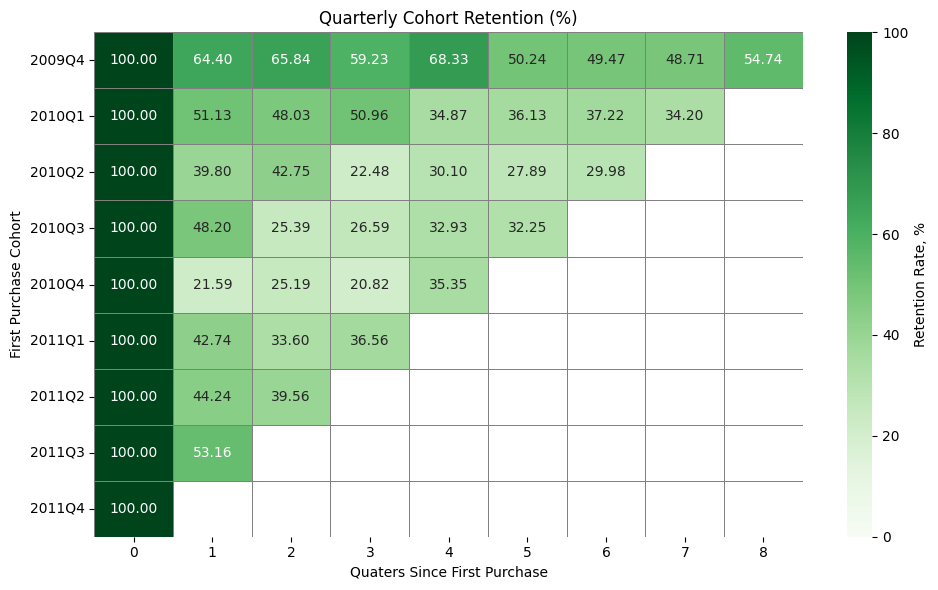

In [18]:
import seaborn as sns

# 1) 분기 정보 추가
data['Quarter'] = data['InvoiceDate'].dt.to_period('Q')

# 2) 고객별 첫 거래 분기(코호트) 계산
first_quarter = data.groupby('Customer ID')['Quarter'].min().rename('Cohort')

# 3) 첫 거래 분기 컬럼을 원본에 붙이기
df = data.join(first_quarter, on= 'Customer ID')

# 4) "코호트 분기에서 얼마나 떨어진 분기" 계산
df['CohortIndex'] = (
    (df['Quarter'].dt.year - df['Cohort'].dt.year) * 4
  + (df['Quarter'].dt.quarter - df['Cohort'].dt.quarter) 
  
)

# 5) 코호트별, 분기차별 활성 고객 수 집계
cohort_count = df.pivot_table(
    index='Cohort',
    columns='CohortIndex',
    values='Customer ID',
    aggfunc='nunique'
)

# 6) 코호트 크기로 나누어 유지율 계산
cohort_size = cohort_count.iloc[:,0]
retention = cohort_count.divide(cohort_size, axis=0) * 100

# 7) 히트맵 코드
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(
    data=retention,
    annot=True,                # 셀 내부에 값 표시
    fmt='.2f',                 # 텍스트 형식 (소수점 2자리)
    cmap='Greens',             # 색상 팔레트
    cbar_kws={'label': 'Retention Rate, %'},  # 컬러바 제목
    linewidths=0.5,            # 셀 간격
    linecolor='gray',          # 셀 경계 색상
    vmin=0, vmax=100  )        # Retention Rate의 범위 설정

plt.title('Quarterly Cohort Retention (%)')
plt.xlabel('Quaters Since First Purchase')
plt.ylabel('First Purchase Cohort')
plt.tight_layout()

# 문제 7: Retention: 코호트 분석(평균 구매수량)
- 분기단위의 활성 사용자의 평균 구매수량을 분석하세요
    - 구매수량이기 때문에 0 index의 값이 100% 가 아닌 절대 값임을 주의

<Axes: xlabel='CohortIndex', ylabel='Cohort'>

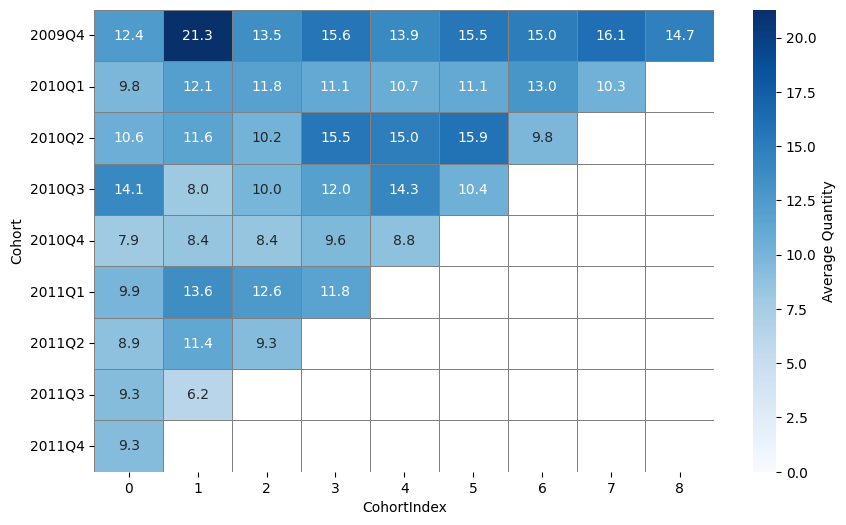

In [19]:
# 코호트별, 분기차별 평균 구매수량 집계 
average_quantity = df.pivot_table(
    index='Cohort',
    columns='CohortIndex',
    values='Quantity',
    aggfunc='mean'
)

# 하트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(
    data=average_quantity,
    annot=True,
    fmt='.1f',
    cmap='Blues',
    cbar_kws={'label': 'Average Quantity'},
    linewidths=0.5,
    linecolor='gray',
    vmin=0
)

# 문제 8: Revenue : ARPU
- 각 고객의 월별 구매 금액을 집계하고, 이를 기반으로 ARPU를 분석하세요.

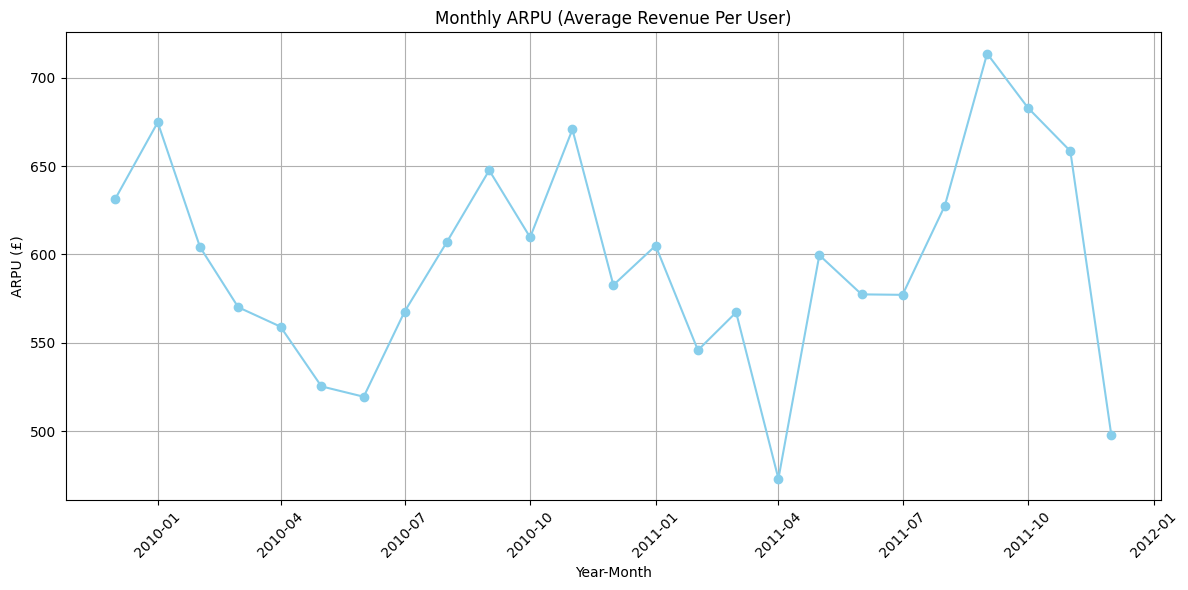

In [20]:
# 1) Year-Month 컬럼 생성
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

# 2) 월별 총매출(TotalRevenue) 및 활성고객수(ActiveUsers) 집계
monthly = (
    data
    .groupby('YearMonth')
    .agg(
        TotalRevenue=('Total', 'sum'),
        ActiveUsers=('Customer ID', 'nunique')
    )
    .sort_index()
)

# 3) ARPU 계산
monthly['ARPU'] = monthly['TotalRevenue'] / monthly['ActiveUsers']

# 4) 시각화를 위해 DatetimeIndex로 변환
arpu = monthly['ARPU']
arpu.index = arpu.index.to_timestamp()

# 5) Monthly ARPU 선그래프
plt.figure(figsize=(12, 6))
plt.plot(arpu.index, arpu.values, marker='o', color='skyblue', linestyle='-')
plt.title("Monthly ARPU (Average Revenue Per User)")
plt.xlabel("Year-Month")
plt.ylabel("ARPU (£)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# 문제 9: Revenue(CLV)
- 고객 생애 가치를 예측하기 위해 CLV를 계산하고 표로 CLV기준으로 내림차순으로 정렬해보세요
- CLV 식: 평균금액 x  평균 구매 빈도 x 고객유지기간(단, Invoce Date의 최대 최소를 빼준 뒤 1을 더해주기)

In [21]:
# 1) 고객별 집계: 총 구매금액, 구매건수, 첫·최종 구매일
clv_df = (
    data
    .groupby('Customer ID')
    .agg(
        total_amount      = ('Total', 'sum'),
        num_purchases     = ('Invoice', 'nunique'),
        first_purchase    = ('InvoiceDate', 'min'),
        last_purchase     = ('InvoiceDate', 'max')
    )
)

# 2) 고객 수명(lifespan) 계산 (일 단위)
clv_df['lifespan'] = (clv_df['last_purchase'] - clv_df['first_purchase']).dt.days + 1

# 3) 평균구매금액, 평균구매빈도 계산
clv_df['avg_amount']        = clv_df['total_amount'] / clv_df['num_purchases']
clv_df['purchase_frequency'] = clv_df['num_purchases'] / clv_df['lifespan']

# 4) CLV 계산
clv_df['CLV'] = (
    clv_df['avg_amount']
  * clv_df['purchase_frequency']
  * clv_df['lifespan']
)

# 5) CLV 기준으로 내림차순 정렬
clv_df = clv_df.sort_values(by='CLV', ascending=False)

# 6) 결과 확인 (상위 10명 예시)
print(clv_df[['avg_amount','purchase_frequency','lifespan','CLV']].head(10))

              avg_amount  purchase_frequency  lifespan        CLV
Customer ID                                                      
18102        3727.977843            0.207037       739  570380.61
14646        3191.110183            0.222826       736  523342.07
14156        1465.660594            0.277092       729  296063.44
14911         521.093941            0.691057       738  265757.91
17450        3793.287705            0.141860       430  231390.55
13694        1158.663659            0.224044       732  190020.84
17511        1982.254353            0.115646       735  168491.62
12415        4341.493636            0.065476       504  143269.29
16684        2176.957692            0.089163       729  141502.25
15061         905.521594            0.187755       735  124961.98


# 문제: 10

- 어떤 회사의 고객 대기시간은 5분에서 15분 사이의 균등분포를 따릅니다. 고객 100명이 대기한 시간을 시뮬레이션하고, 평균 대기시간과 표준편차를 계산하세요.

In [22]:
import numpy as np
# 1) 5분에서 15분 사이 균등분포로부터 100개 시뮬레이션
wait_times = np.random.uniform(5, 15, size=100)

# 2) 평균과 표준편차 계산
mean_wait = wait_times.mean()
std_wait  = wait_times.std(ddof=0)   # 모집단 표준편차

print(f"샘플 평균 대기시간: {mean_wait:.2f}분")
print(f"샘플 표준편차 (모집단 기준): {std_wait:.2f}분")

샘플 평균 대기시간: 9.30분
샘플 표준편차 (모집단 기준): 2.81분


# 문제: 11

- 한 신제품의 초기 성공 확률이 0.3이라고 가정합니다. 10회의 시뮬레이션에서 성공한 횟수를 구하고, 각 성공 여부를 출력하세요.

In [23]:
# 10번의 베르누이 시뮬레이션: 성공(1) 확률 p=0.3
trials = np.random.binomial(n=1, p=0.3, size=10)

# 성공 여부 출력 (1=성공, 0=실패)
print("각 시도 성공 여부:", trials.tolist())

# 성공 횟수 계산
success_count = trials.sum()
print("성공 횟수:", success_count)

각 시도 성공 여부: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
성공 횟수: 1


# 문제: 12

- 한 수업에서 학생 20명이 5문제로 구성된 퀴즈를 치릅니다. 각 문제의 정답 확률은 0.7이라고 가정할 때, 각 학생이 맞힌 점수를 시뮬레이션하고, 전체 학생의 평균 점수를 계산하세요.

In [24]:
# 1) 재현을 위해 시드 설정
np.random.seed(42)

# 2) 20명 학생이 각 5문제를 맞힐 확률 p=0.7로 시뮬레이션
#    size=(20,5)로 20개의 행(학생), 5개의 열(문제)을 생성
scores = np.random.binomial(n=1, p=0.7, size=(20, 5)).sum(axis=1)

# 3) 전체 학생의 평균 점수 계산
average_score = scores.mean()

# 4) 결과 출력
print("각 학생의 맞힌 문제 수:", scores)
print(f"전체 학생의 평균 점수: {average_score:.2f}점")

각 학생의 맞힌 문제 수: [3 3 3 5 5 4 3 4 4 5 1 4 4 3 2 3 4 3 2 5]
전체 학생의 평균 점수: 3.50점


# 문제: 13

- 한 공장에서 생산되는 제품의 무게는 평균 50g, 표준편차 5g의 정규분포를 따릅니다.1000개의 제품 무게를 시뮬레이션하고, 무게가 45g 이상 55g 이하인 제품의 비율을 계산(변수명: `within_range`)하세요. 무게 분포의 히스토그램을 그리세요.

45g 이상 55g 이하 제품 비율: 69.80%


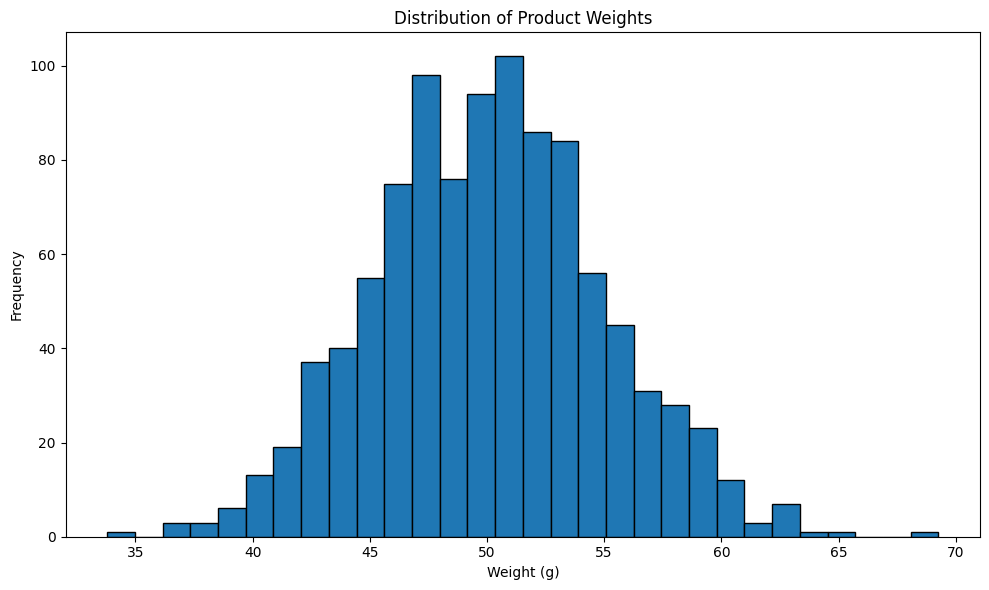

In [25]:
np.random.seed(42)

# 1) 1000개의 제품 무게 시뮬레이션 (평균 50g, 표준편차 5g)
weights = np.random.normal(loc=50, scale=5, size=1000)

# 2) 45g 이상 55g 이하인 제품 비율 계산
within_range = np.mean((weights >= 45) & (weights <= 55))

# 3) 비율 출력
print(f"45g 이상 55g 이하 제품 비율: {within_range:.2%}")

# 4) 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(weights, bins=30, edgecolor='black')
plt.xlabel('Weight (g)')
plt.ylabel('Frequency')
plt.title('Distribution of Product Weights')
plt.tight_layout()
plt.show()

# KPT 회고

##  Keep  
- 가독성 높은 시각화를 위해 변수를 조작해본 점

##  Problem  
- 시각화 파라미터 오타 실수가 잦음
  
##  Try  
- 다양한 실습문제를 접해보며 프로그래밍 익숙도를 높여보자
